<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/DeepLearning/DL_day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


텍스트 분석 - 분류, 감정분석, 요약(토픽 모델링), 군집화  

텍스트 분석을 위한 전처리 과정 :  
1. cleaning - 불필요한 문자, 기호 제거
2. tokenization - 문장 토큰화, 단어 토큰화, 단어 순서 고려한 토큰화
3. 필터, 절차 수정, stop word 제거
4. 어근 추출 (의미를 갖는 단어 원형 추출 ) - Steamming, Lemmatiziton  
5. 정규화 - 추출된 단어 기반으로 수치 벡터화, Count, tf-idf

### 감성 분석

• 문서의 주관적인 감성/의견/감정/기분 등을 파악하기 위한 방법

• 문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성 수치를 계산하는 방법을 이용

• 지도학습 – 학습 데이터와 타깃 레이블 값을 기반으로 감정 분석을 수행한 뒤 이를 기반으로 다른 데이터의 감정 분석을 예측하는 방법

• 비지도 학습 - Lexicon이라는 일종의 감정 어휘 사전을 이용

• Lexicon - 감정 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단합니다.

감성 분석 순서

1. 클린징
2. 학습, 테스트 데이터 분리
3. 피처 벡터화 (CountVectorizer)
4. ML분류 알고리즘 LogisticRegression 적용
5. 예측 성능 평가 - 정확도와 ROC-AUC를 측정
6. TF-IDF벡터화
7. ML분류 알고리즘 LogisticRegression 적용

In [2]:
# 지도학습 기반 IMDB 영화평 감정 분석

import pandas as pd

review_df = pd.read_csv('labeledTrainData.tsv', header=0, sep='\t', quoting=3)
review_df.head()

print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [4]:
import re

#<br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

#re 모듈을 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

#변환이 잘 됐는지 확인
#print(review_df['review'][0])

In [6]:
#학습, 테스트 데이터 분할
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis = 1, inplace=False)
print(feature_df)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size = 0.3, random_state = 156)

X_train.shape, X_test.shape  #((17500, 1), (7500, 1))

                                                  review
0       With all this stuff going down at the moment ...
1         The Classic War of the Worlds   by Timothy ...
2       The film starts with a manager  Nicholas Bell...
3       It must be assumed that those who praised thi...
4       Superbly trashy and wondrously unpretentious ...
...                                                  ...
24995   It seems like more consideration has gone int...
24996   I don t believe they made this film  Complete...
24997   Guy is a loser  Can t get girls  needs to bui...
24998   This    minute documentary Bu uel made in the...
24999   I saw this movie as a child and it broke my h...

[25000 rows x 1 columns]


((17500, 1), (7500, 1))

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, Filtering, Ngram은 (1, 2)로 설정하여 CountVectorization 수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
                     ('cnt_vect', CountVectorizer(stop_words = 'english', ngram_range=(1, 2))), 
                     ('lr_clf', LogisticRegression(C=10))])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행, predict_proba()는 roc_auc 때문에 수행. 
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])

print('CountVectorizer 예측 정확도는 {0:.4f}'.format(accuracy_score(y_test, pred)))

#CountVectorizer 예측 정확도는 0.8860

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CountVectorizer 예측 정확도는 0.8860


In [10]:
# 스톱 워드는 english, filtering, ngram은 (1, 2)로 설정해 TF-IDF 벡터화 수행
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
                     ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range = (1, 2))), 
                     ('lr_clf', LogisticRegression(C=10))])
                     
pipeline.fit(X_train['review'], y_train)-
pred = pipeline.predict(X_test['review'])

print('TfidfVectorizer 예측 정확도는 {0:.4f}'.format(accuracy_score(y_test, pred)))

TfidfVectorizer 예측 정확도는 0.8936


감성 분석

• NLTK : 시맨틱을 프로그램적으로 인터페이스화 할 수 있게 제공  
• 제공되는 WordNet은 다양한 상황에서 같은 어휘라도 다르게 사용되는 어휘의 시맨틴 정보를 제공

• SentiWordNet : NLTK패키지의 WordNet과 유사  
• 감성 단어 전용의 WordNet을 구현  
• WordNet의 Synset별로 3가지 감성 점수를 할당합니다.  
• SentiWordNet 모듈의 senti_synsets()는 WordNet 모듈이라서 synsets()와 비슷하게 Senti_Synset 클래스를 리스트 형태로 반환

In [ ]:
import nltk
nltk.download('all')

In [12]:
from nltk.corpus import wordnet as wn

#WordNet (동의어/반의어 사전)
term = 'present'
synsets = wn.synsets(term)
print('synsets() 반환 type:', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값:', synsets)

synsets() 반환 type: <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


In [ ]:
#18개의 객체가 가지는 속성 확인
#preset의 여러 의미를 걔층구조 상위어, 하위어 정보를 반환
for synset in synsets:
  print("#### Synset name :", synset.name(), "####")
  print("POS :", synset.lexname()) 
  print('Definition:', synset.definition())
  print('Lemmas:', synset.lemma_names())

#synset은 비슷한 단어 묶음
#pos() : 품사 출력, example(): 예제 문장, hypernym(): 상위어, hyponym(): 하위어
#lemmas(): 단어에 대한 기본형 리스트, synset의 동의어
#n:명사, v:동사, a

In [15]:
#단어를 sysnset객체로 생성

tree = wn.synset('tree.n.01')
tiger = wn.synset('tiger.n.01')
lion = wn.synset('lion.n.01')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, tiger, lion, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 `synset`과 유사도를 측정함
for entity in entities:
  similarity = [round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
  similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 `synset`과의 유사도를 `DataFrame` 형태로 저장
similarity_df = pd.DataFrame(similarities, columns = entity_names, index = entity_names)
similarity_df

,tree,tiger,lion,cat,dog
tree,1.00,0.14,0.07,0.08,0.12
tiger,0.14,1.00,0.08,0.09,0.17
lion,0.07,0.08,1.00,0.25,0.17
cat,0.08,0.09,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [16]:
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type:', type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synsets() 반환 값:', senti_synsets)

senti_synsets() 반환 type: <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synsets() 반환 값: [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


In [21]:
father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수: ', father.pos_score())
print('father 부정감성 지수: ', father.neg_score())
print('father 객관성 지수: ', father.obj_score())

fabulous  = swn.senti_synset('fabulous.a.01')
print('fabulous  긍정감성 지수: ', fabulous.pos_score())
print('fabulous  부정감성 지수: ', fabulous.neg_score())
print('fabulous  객관성 지수: ', fabulous.obj_score())

father 긍정감성 지수:  0.0
father 부정감성 지수:  0.0
father 객관성 지수:  1.0
fabulous  긍정감성 지수:  0.875
fabulous  부정감성 지수:  0.125
fabulous  객관성 지수:  0.0


In [28]:
def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

In [29]:
#SentiWordNet 영화 감상평 감성 분석
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)  #문장토큰화

    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))  #단어토큰화
        for word , tag in tagged_sentence:
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)  #품사태깅
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)  #어근 추출
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [30]:
review_df['preds'] = review_df['review'].apply(lambda x: swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print("정확도:", np.round(accuracy_score(y_target, preds), 4))
print("정밀도:", np.round(precision_score(y_target, preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


#### VADER : 소설 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지

• 뛰어난 감성 분석 결과를 제공

• 비교적 빠른 수행 시간을 보장해 대용량 텍스트 데이터에 잘 사용되는 패키지

• Pattern : 예측 성능 측면에서 가장 주목 받는 패키지

In [31]:
#VADER lexion 비지도학습 기반 IMDB 영화평 감정 분석

from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [33]:
def get_sentiment(review, threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    compound_score = scores['compound']
    #hreshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
    final_sentiment = 1 if compound_score >= threshold else 0
    return final_sentiment

 # 각 텍스트 데이터에 위에서 설정한 감성 label 얻는 함수 적용하기
# 임계값은 0.1로 설정
review_df['vader_pred'] = review_df['review'].apply(lambda x : get_sentiment(x, 0.1))
# 원본 데이터에서 주어진 정답 label과 VADER로 예측한 label 비교
y_target = review_df['sentiment'].values
y_pred = review_df['vader_pred'].values

In [34]:
print(confusion_matrix(y_target, y_pred))
print("정확도 :", accuracy_score(y_target, y_pred))
print("정밀도 :", precision_score(y_target, y_pred))
print("재현율 :", recall_score(y_target, y_pred))
print("F1 score :", f1_score(y_target, y_pred))

[[ 6736  5764]
 [ 1867 10633]]
정확도 : 0.69476
정밀도 : 0.6484722815149113
재현율 : 0.85064
F1 score : 0.7359241443748487


#### 문서 유사도

• 자연어 처리에서는 문서의 유사도를 구하여 각 문서간의 주제 유사도를 판별하기도 한다

##### • 코사인 유사도(Cosine Similarity)

• 코사인 유사도는 두 벡터 간의 각도에 기반하여 구할 수 있는 값이다. 두 벡터의 각도, 즉 방향이 완전히 일치하다면 1을 반환하게 되며, 수직일 경우 0, 완전 정반대 일경우 -1를 반환하게 된다

In [35]:
#코사인 유사도(Cosine Similarity)
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

vec1=np.array([0,1,1,1]) #문서1 : 저는 사과 좋아요
vec2=np.array([1,0,1,1]) #문서2 : 저는 바나나 좋아요
vec3=np.array([2,0,2,2]) #문서3 : 저는 바나나 좋아요 저는 바나나 좋아요

print(cos_sim(vec1, vec2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(vec1, vec3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(vec2, vec3)) #문서2과 문서3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


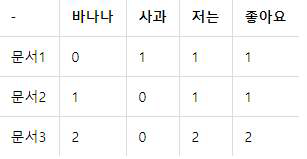

##### 유클리드 거리(Euclidean distance) - 다차원 공간에서의 점과 점 사이의 거리를 구하는 공식

• 공식 자체는 피타고라스 정리에서 삼각형의 빗면을 구하는 방식과 똑같다.

In [37]:
import numpy as np

def dist(x,y):
    return np.sqrt(np.sum((x-y)**2))

vec1 = np.array((2,3,0,1)) #바나나 바나나 사과 사과 사과 좋아요
vec2 = np.array((1,2,3,1)) #바나나 사과 사과 저는 저는 저는 좋아요
vec3 = np.array((2,1,2,2)) #바나나 바나나 사과 저는 저는 좋아요 좋아요
vecQ = np.array((1,1,0,1)) #바나나 사과 좋아요

print(dist(vec1,vecQ))
print(dist(vec2,vecQ))
print(dist(vec3,vecQ))

#유클리드 거리의 값이 가장 작다는 것은, 문서 간의 거리가 가장 가깝다는 것

2.23606797749979
3.1622776601683795
2.449489742783178


##### 맨허튼 거리 - 유클리드와 마찬가지로 좌표상의 거리를 표현하지만 해당 거리 차이를 절대값의 차이로 계산하는 기법

In [40]:
def dist(x,y):
    return np.sum(np.absolute(x-y))

vec1 = np.array((2,3,0,1)) #바나나 바나나 사과 사과 사과 좋아요
vec2 = np.array((1,2,3,1)) #바나나 사과 사과 저는 저는 저는 좋아요
vec3 = np.array((2,1,2,2)) #바나나 바나나 사과 저는 저는 좋아요 좋아요
vecQ = np.array((1,1,0,1)) #바나나 사과 좋아요

print(dist(vec1,vecQ))
print(dist(vec2,vecQ))
print(dist(vec3,vecQ))

3
4
4


##### 자카드 유사도(Jaccard similarity) - 각 집합에 대하여 얼마나 같은 원소를 많이 포함하고 있는가를 구하는 기법

• 자카드 유사도는 0과 1사이의 값을 가지며, 두 집합이 동일하다면 1의 값을 가지고, 공통 부분이 없다면 0의 값을 가지게 된다.

• 집합 연산을 사용

In [39]:
set1 = ['apple', 'banana', 'everyone', 'like', 'likey', 'watch', 'card', 'holder']
set2 = ['apple', 'banana', 'coupon', 'passport', 'love', 'you']
union = set(set1).union(set(set2)) # 두 집합의 합집합
intersection = set(set1).intersection(set(set2)) # 두 집합의 교집합
len(intersection)/len(union)

0.16666666666666666

### 토픽 모델링(Topic Modeling)

• 기계 학습 및 자연어 처리 분야에서 토픽이라는 문서 집합의 추상적인 주제를 발견하기 위한 통계적 모델

• 텍스트 본문의 숨겨진 의미 구조를 발견하기 위해 사용되는 텍스트 마이닝 기법

• LSA : DTM을 차원 축소 하여 축소 차원에서 근접 단어들을 토픽으로 묶는다.

• LDA : 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽을 추출한다.

• 잠재 의미 분석(Latent Semantic Analysis, LSA)-토픽 모델링이라는 분야에 아이디어를 제공한 알고리즘

• DTM(문서 단어 행렬)이나 TF-IDF 행렬에 절단된 SVD(truncated SVD)를 사용하여 차원을 축소시키고, 단어들의 잠재적인 의미를 끌어낸다

• Truncated SVD - 절단된 SVD는 대각 행렬 Σ의 대각 원소의 값 중에서 상위값 t개만 남게 됩니다. 절단된 SVD를 수행하면 값의 손실이 일어나므로 기존의 행렬 A를 복구할 수 없습니다. 또한, U행렬과 V행렬의 t열까지만 남깁니다.

In [44]:
#LSA 문서 유사도
A = np.array([[0, 0, 0, 1, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 0, 1, 0, 0],[0, 1, 1, 0, 2, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 1, 1]])
np.shape(A)

#FullSVD 실행
U, s, VT = np.linalg.svd(A, full_matrices= True) #s는 대각행렬

print(U.round(2)) # U 직교행렬
np.shape(U)

print(s.round(2)) # 대각행렬의 특이값의 리스트를 반환
np.shape(s)

print(VT.round(2)) # V 직교행렬의 역행렬
np.shape(VT)

[[-0.24  0.75  0.   -0.62]
 [-0.51  0.44 -0.    0.74]
 [-0.83 -0.49 -0.   -0.27]
 [-0.   -0.    1.    0.  ]]
[2.69 2.05 1.73 0.77]
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [ 0.   -0.35 -0.35  0.16  0.25 -0.8   0.16 -0.   -0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]


(9, 9)

In [45]:
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
print(S.round(2))
np.shape(S)

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]


(4, 9)

In [46]:
# U × S × VT를 하면 기존의 행렬 A가 나와야 합니다. 
#Numpy의 allclose()는 2개의 행렬이 동일하면 True를 리턴
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))

True

In [49]:
#Truncated SVD 실행 (t=2로 설정)
S=S[:2,:2]
print(S.round(2))

#직교 행렬 U에 대해서도 2개의 열만 남기고 제거
U=U[:,:2]
print(U.round(2))

#행렬 V의 전치 행렬인 VT에 대해서 2개의 행만 남기고 제거
VT=VT[:2,:]
print(VT.round(2))

[[2.69 0.  ]
 [0.   2.05]]
[[-0.24  0.75]
 [-0.51  0.44]
 [-0.83 -0.49]
 [-0.   -0.  ]]
[[-0.   -0.31 -0.31 -0.28 -0.8  -0.09 -0.28 -0.   -0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


In [50]:
# U × S × VT를 하면 기존의 행렬 A와 다른 결과가 나옴 (값이 손실되었기 때문=> 기존 행렬 A로 복구 불가)
A_prime=np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.   -0.    0.    0.    0.  ]]


1. 대체적으로 기존에 0인 값들은 0에 가가운 값이 나오고, 1인 값들은 1에 가까운 값이 나오는 것을 볼 수 있다 
2. VT의 각 열은 잠재 의미를 표현하기 위해 수치화된 각각의 단어 벡터라고 볼 수 있다
3. Truncated SVD를 이용하여 문서 벡터들과 단어 벡터들을 통해 다른 문서의 유사도, 다른 단어의 유사도, 단어(쿼리)로부터 문서의 유사도를 구하는 것들이 가능


In [57]:
#주제가 다른 20 뉴스그룹 데이터를 토픽 모델링
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

documents[1]

print(dataset.target_names) #20개의 카테고리 확인

news_df = pd.DataFrame({'document':documents})

#특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

#길이가 3이하인 단어는 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x:' '.join([w for w in x.split() if len (w)>3]))

#전체단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

print(news_df['clean_doc'][1])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons


In [59]:
# 불용어 처리 및 토큰화
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x : x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


In [60]:
#TF-IDF 행렬 변환 (토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df =0.5, smooth_idf=True)
X = vectorizer.fit_transform(news_df['clean_doc'])
print(X.shape)

(11314, 1000)


In [61]:
#토픽 모델링 수행 (Truncated SVD로 차원축소 t=20)
#사이킷런의 TruncatedSVD 클래스의 토픽 개수 설정 인수는 n_components
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(n_components=20, algorithm = 'randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)
#학습된 모델의 components_는 LSA의 VT입니다 (tX단어의 수)

20

In [65]:
#20개의 토픽에서 가장 값이 큰 5개의 단어 출력
terms = vectorizer.get_feature_names()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print('Topic %d: '%(idx + 1), [terms[i] for i in topic.argsort()[: -n - 1: -1]])

get_topics(svd_model.components_, terms)

Topic 1:  ['just', 'like', 'know', 'people', 'think']
Topic 2:  ['thanks', 'windows', 'card', 'drive', 'mail']
Topic 3:  ['game', 'team', 'year', 'games', 'drive']
Topic 4:  ['drive', 'scsi', 'disk', 'hard', 'problem']
Topic 5:  ['drive', 'know', 'thanks', 'does', 'just']
Topic 6:  ['just', 'like', 'windows', 'know', 'does']
Topic 7:  ['just', 'like', 'mail', 'bike', 'thanks']
Topic 8:  ['does', 'know', 'chip', 'like', 'card']
Topic 9:  ['like', 'card', 'sale', 'video', 'offer']
Topic 10:  ['like', 'drive', 'file', 'files', 'sounds']
Topic 11:  ['people', 'like', 'thanks', 'card', 'government']
Topic 12:  ['think', 'good', 'thanks', 'need', 'chip']
Topic 13:  ['think', 'does', 'just', 'mail', 'like']
Topic 14:  ['know', 'good', 'people', 'windows', 'file']
Topic 15:  ['space', 'know', 'think', 'nasa', 'card']
Topic 16:  ['does', 'israel', 'think', 'right', 'israeli']
Topic 17:  ['good', 'space', 'card', 'does', 'thanks']
Topic 18:  ['people', 'does', 'window', 'problem', 'space']
Topic

토픽 모델링 알고리즘 

• 문서들이 토픽들의 혼합으로 구성되어져 있다고 가졍하며, 토픽들은 확률 분포를 기반으로 단어들이 생성된다고 가정함

LDA 
1. 사용자는 알고리즘에게 토픽의 개수 k를 알려줍니다.
2. 모든 단어를 k개 중 하나의 토픽에 할당합니다.
3. 어떤 문서의 각 단어 w는 자신은 잘못된 토픽에 할당되어져 있지만, 다른 단어들은 전부 올바른 토픽에 할당되어져 있는 상태라고 가정합니다. 이에 따라 단어 w는 두 가지 기준에 따라서 토픽이 재할당됩니다. (반복)

• p(topic t | document d) : 문서 d의 단어들 중 토픽 t에 해당하는 단어들의 비율
• p(word w | topic t) : 각 토픽들 t에서 해당 단어 w의 분포

In [66]:
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_doc) 

#각 단어의 (word_id, word_frequency)의 형태를 정수 인코딩 수행
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[0]) #단어의 정수 인코딩값과 빈도수
print(dictionary[66])  #단어의 정수 인코딩값 , 기존단어 =faith
print(len(dictionary))

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)]
faith
65284


In [67]:
import gensim
t = 20 #20개의 토픽
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = t, id2word=dictionary, passes=15) #passes는 알고리즘 동작 횟수
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic) #토픽에 대한 기여도

(0, '0.011*"president" + 0.009*"government" + 0.008*"states" + 0.007*"state"')
(1, '0.009*"wire" + 0.008*"ground" + 0.007*"filename" + 0.006*"wiring"')
(2, '0.014*"said" + 0.010*"people" + 0.008*"know" + 0.008*"went"')
(3, '0.019*"file" + 0.019*"output" + 0.018*"entry" + 0.013*"program"')
(4, '0.007*"nubus" + 0.005*"liar" + 0.005*"macs" + 0.004*"decenso"')
(5, '0.011*"would" + 0.011*"drive" + 0.011*"thanks" + 0.010*"know"')
(6, '0.011*"good" + 0.009*"price" + 0.007*"like" + 0.007*"sale"')
(7, '0.014*"university" + 0.011*"april" + 0.008*"center" + 0.007*"research"')
(8, '0.008*"runs" + 0.008*"right" + 0.007*"left" + 0.007*"back"')
(9, '0.016*"would" + 0.014*"people" + 0.006*"like" + 0.006*"think"')
(10, '0.017*"armenian" + 0.016*"turkish" + 0.013*"armenians" + 0.010*"turkey"')
(11, '0.012*"encryption" + 0.010*"chip" + 0.010*"government" + 0.010*"security"')
(12, '0.015*"israel" + 0.012*"jews" + 0.009*"israeli" + 0.009*"health"')
(13, '0.007*"science" + 0.006*"think" + 0.005*"objective" 

In [69]:
#문서 별 토픽 분포

for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(9, 0.36643258), (12, 0.4657715), (13, 0.023871293), (15, 0.02057987), (17, 0.11124801)]
1 번째 문서의 topic 비율은 [(1, 0.11514453), (8, 0.038037624), (9, 0.18257111), (13, 0.1292207), (14, 0.027046261), (17, 0.34722865), (19, 0.14489748)]
2 번째 문서의 topic 비율은 [(1, 0.017270287), (2, 0.2028719), (12, 0.30199325), (13, 0.0757194), (17, 0.39004838)]
3 번째 문서의 topic 비율은 [(5, 0.26338184), (7, 0.04114795), (8, 0.016816545), (9, 0.11775025), (11, 0.2989814), (17, 0.25147423)]
4 번째 문서의 topic 비율은 [(3, 0.066534124), (15, 0.27009544), (16, 0.20208488), (17, 0.43165594)]


문서 군집화

• 데이터 안에서 숨겨진 구조를 찾는다

군집화 알고리즘 - k-means, 밀도 기반의 DBSCAN

k-means:  
1. 특성 공간 내에 랜덤하게 k개의 좌표점을 초기 클러스터 중심점으로 선택
2. 모든 샘플들을 가장 가까운 중심점에 할당
3. 할당된 샘플들의 중심으로 centroid의 위치를 update
4. 2-3을 반복, 클러스터 할당이 더 이상 변하지 않을 때까지 

• 동일한 군집에 속하는 문서를 같은 카테고리 소속으로 분류(텍스트 분류 기반의 문서 분류와 유사)

• 텍스트 분류 기반의 문서 분류는 사전에 결정 카테고리 값을 가진 학습 데이터 세트가 필요한 데 반해, 문서 군집화는 학습 데이터 세트가 필요없는 비지도학습 기반으로 동작합니다.

In [70]:
#opinion review

import os, glob

path = '/content/drive/MyDrive/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list =[]
opinion_text = []

#여러 개의 파일을 DataFrame으로 읽은 후 다시 문자열로 반환한 뒤 파일 내용 리스트에 추가
for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
print(document_df.head())

                          filename                                       opinion_text
0           food_swissotel_chicago                                                ...
1     display_garmin_nuvi_255W_gps                                                ...
2  directions_garmin_nuvi_255W_gps                                                ...
3        comfort_toyota_camry_2007                                                ...
4        comfort_honda_accord_2008                                                ...


In [73]:
#cleansing, 토큰화, 어근추출, 불용어 제거, 피처 벡터화
import string
from nltk.stem import WordNetLemmatizer

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

tfodf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfodf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [76]:
#각 문서별 텍스트가 TF-IDF변환된 피처 벡터화 행렬 데이터에 대해서 군집화를 수행
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=5, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
print(document_df.head())

print(document_df[document_df['cluster_label']==0].sort_values(by='filename'))
print(document_df[document_df['cluster_label']==1].sort_values(by='filename'))
print(document_df[document_df['cluster_label']==2].sort_values(by='filename'))
print(document_df[document_df['cluster_label']==3].sort_values(by='filename'))
print(document_df[document_df['cluster_label']==4].sort_values(by='filename'))

                          filename  ... cluster_label
0           food_swissotel_chicago  ...             1
1     display_garmin_nuvi_255W_gps  ...             0
2  directions_garmin_nuvi_255W_gps  ...             0
3        comfort_toyota_camry_2007  ...             3
4        comfort_honda_accord_2008  ...             3

[5 rows x 3 columns]
                           filename  ... cluster_label
10    accuracy_garmin_nuvi_255W_gps  ...             0
2   directions_garmin_nuvi_255W_gps  ...             0
1      display_garmin_nuvi_255W_gps  ...             0
32   satellite_garmin_nuvi_255W_gps  ...             0
31      screen_garmin_nuvi_255W_gps  ...             0
13       speed_garmin_nuvi_255W_gps  ...             0
16     updates_garmin_nuvi_255W_gps  ...             0
17       voice_garmin_nuvi_255W_gps  ...             0

[8 rows x 3 columns]
                           filename  ... cluster_label
9    bathroom_bestwestern_hotel_sfo  ...             1
50          food_holiday_in

In [77]:
#군집화 수 조정
km_cluster = KMeans(n_clusters=3, max_iter=1000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label')


,filename,opinion_text,cluster_label
37,performance_honda_accord_2008,...,0
46,interior_toyota_camry_2007,...,0
45,interior_honda_accord_2008,...,0
3,comfort_toyota_camry_2007,...,0
4,comfort_honda_accord_2008,...,0
44,gas_mileage_toyota_camry_2007,...,0
42,mileage_honda_accord_2008,...,0
15,transmission_toyota_camry_2007,...,0
34,quality_toyota_camry_2007,...,0
30,seats_honda_accord_2008,...,0
